In [2]:
from PIL import Image
import numpy as np

import albumentations as A

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline


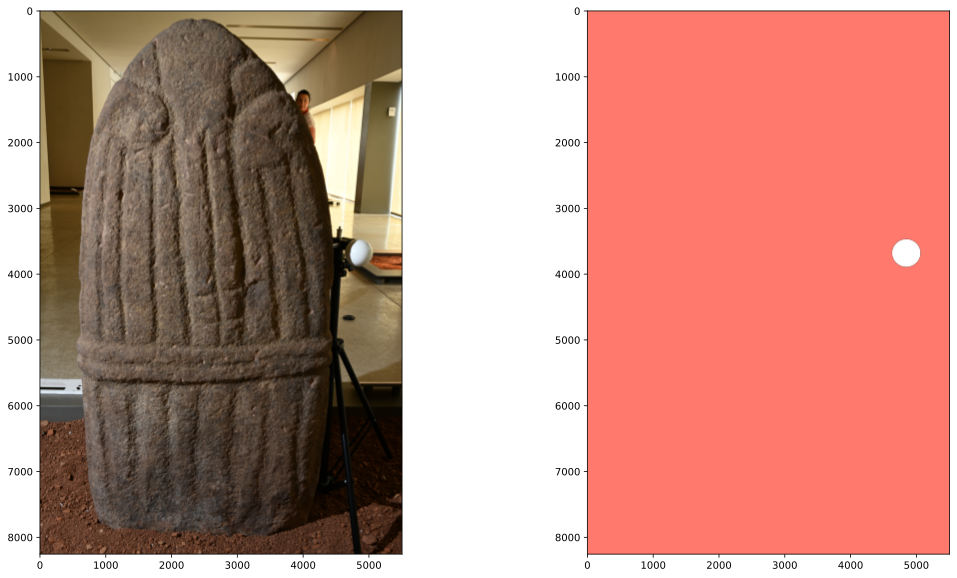

In [4]:
img = Image.open("/tmp/extract/photo.jpg").convert("RGBA")
mask = Image.open("/tmp/extract/MASK.PNG").convert("LA")

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(mask)

ax = plt.gca()
ax.set_facecolor('xkcd:salmon')

plt.show()


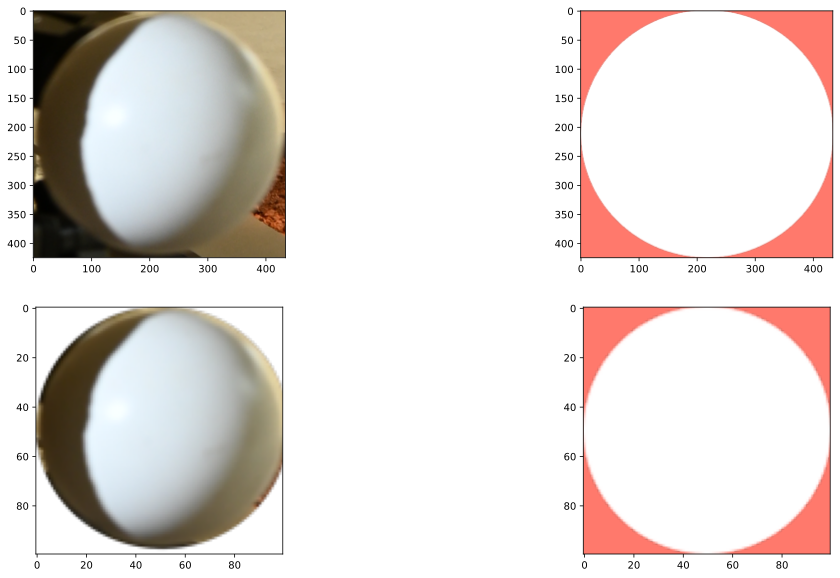

(434, 425)


In [16]:
box = mask.getbbox()

crop_img = img.crop(box)
crop_mask = mask.crop(box)

plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.imshow(crop_img)

plt.subplot(2, 2, 2)
plt.imshow(crop_mask)

ax = plt.gca()
ax.set_facecolor('xkcd:salmon')

empty = Image.fromarray(np.zeros(crop_img.size), "RGBA")
empty.paste(crop_img, crop_mask)

plt.subplot(2, 2, 3)
plt.imshow(empty.resize((100, 100)))

plt.subplot(2, 2, 4)
plt.imshow(crop_mask.resize((100, 100)))

ax = plt.gca()
ax.set_facecolor('xkcd:salmon')

plt.show()

print(crop_img.size)

In [43]:
from pathlib import Path

spheres_to_extract_dir = "/home/lilian/data_disk/lfainsin/test/"

spheres = list(Path(spheres_to_extract_dir).glob("**/*.jpg"))

parents = [path.parent for path in spheres]
parents = set(parents)

for parent in parents:
    mask_path = parent.joinpath("MASK.PNG")
    mask = Image.open(mask_path).convert("LA")
    box = mask.getbbox()
    crop_mask = mask.crop(box)

    filename = Path("/tmp/saves/" + str(mask_path).strip(spheres_to_extract_dir))
    filename.parent.mkdir(parents=True, exist_ok=True)
    crop_mask.save(filename)

    spheres = list(parent.glob("*.jpg"))
    for sphere in spheres:
        img = Image.open(sphere).convert("RGB")
        crop_img = img.crop(box)

        filename = Path("/tmp/saves/" + str(sphere).strip(spheres_to_extract_dir))
        filename.parent.mkdir(parents=True, exist_ok=True)
        crop_img.save(filename)
